# Three-layer planar waveguide #

This code graphically calculates the effective indices $n_{eff}$ of the TE modes propagating in a three-layer planar waveguide. 

<br>

<div style="text-align: center;">
  <img src="planar_waveguide.png" width="300" heigth="200">
</div>

<br>

In this waveguide, we have:

$$\frac{u\left(v+w\right)}{u^{2}-vw} = \tan(2u)$$

with:

$$u = ak_{0}\sqrt{{n_{f}}^{2}-{n_{eff}}^{2}}$$
$$w = ak_{0}\sqrt{{n_{eff}}^{2}-{n_{c}}^{2}}$$
$$v = ak_{0}\sqrt{{n_{eff}}^{2} - {n_{s}}^{2}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nf = 3.5
ns = 1.45
nc = 1

micrometers = 1e-6

a = 0.25 * micrometers
lam0 = 1.55 * micrometers
k0 = 2 * np.pi / lam0

def u(neff):
    root = np.sqrt(nf**2 - neff**2)
    return a * k0 * root

def w(neff):
    root = np.sqrt(neff**2 - nc**2)
    return a * k0 * root

def v(neff):
    root = np.sqrt(neff**2 - ns**2)
    return a * k0 * root

In [2]:
def right_side(neff):
    y = np.tan(2*u(neff))
    y[np.abs(y) > 25] = np.nan # Filtering out big values
    return y


def left_side(neff):
    numerator = u(neff) * (v(neff) + w(neff))
    denominator = u(neff)**2 - v(neff) * w(neff)
    y = numerator / denominator
    y[np.abs(y) > 25] = np.nan
    return y

## Solve the equation: ##

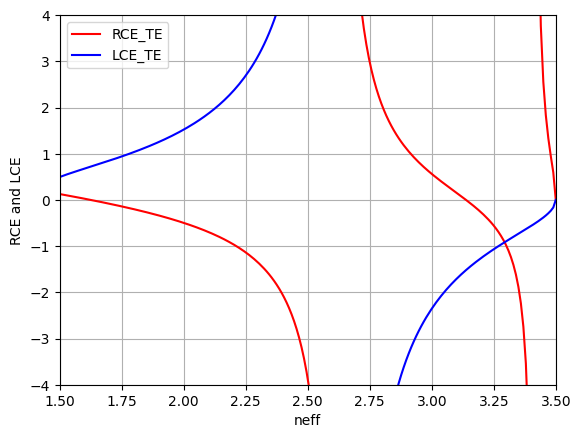

In [3]:
neff = np.linspace(1.5, 3.5, 200)

plt.plot(neff, right_side(neff), color = 'red', label = 'RCE_TE') # RCE -> Right side of Caracteristic Equation for TE mode
plt.plot(neff, left_side(neff), color = 'blue', label = 'LCE_TE') # LCE -> Left side of Caracteristic Equation for TE mode
plt.xlabel('neff')
plt.ylabel('RCE and LCE')
plt.xlim(1.5,3.5)
plt.ylim(-4,4)
plt.grid(True)
plt.legend(loc = 'best')
plt.show()